In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import numpy as np

import scipy
from scipy.optimize import curve_fit
import seaborn as sns


import spacy
from spacy import displacy
import scattertext

from scipy import stats

import spacy

from wordcloud import WordCloud, STOPWORDS


In [2]:
df = pd.read_csv('train.csv')    
df_pos = df.loc[df['target'] == 1]
df_neg = df.loc[df['target'] == 0]

In [3]:
stopwords = set(STOPWORDS)
test = list(stopwords)
display(df)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


Text(0.5, 1.0, 'Keywords When there is a Natural Disaster')

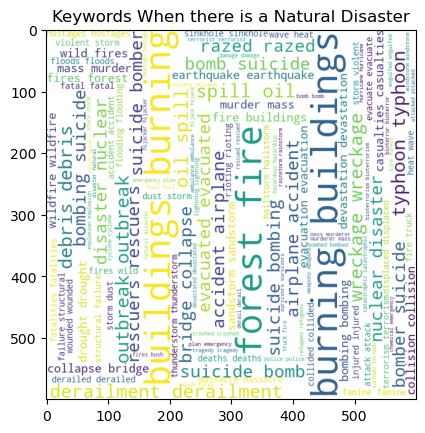

In [4]:
allText = ""

for i in df_pos['keyword']:
    i = str(i)
    i = i.replace("%20", " ")
    i = i.replace("nan", "")
    words = i.split()
    allText = allText + " ".join(words) + " "

wordcloud = WordCloud(height = 600, width = 600, background_color = 'white', min_font_size=8).generate(allText)

plt.imshow(wordcloud)
plt.title("Keywords When there is a Natural Disaster")
        

Text(0.5, 1.0, 'Keywords When there is No Natural Disaster')

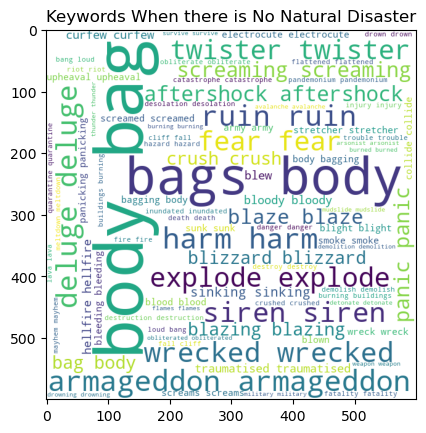

In [5]:
allText = ""

for i in df_neg['keyword']:
    i = str(i)
    i = i.replace("%20", " ")
    i = i.replace("nan", "")
    words = i.split()
    allText = allText + " ".join(words) + " "

wordcloud = WordCloud(height = 600, width = 600, background_color = 'white', min_font_size=8).generate(allText)

plt.imshow(wordcloud)
plt.title("Keywords When there is No Natural Disaster")
        

In [6]:
print(stopwords)

{'he', "they're", 'about', 'she', "doesn't", 'had', 'most', 'into', 'like', 'they', "you'll", "he'd", 'yours', 'hence', 'before', 'as', 'myself', 'an', 'when', 'k', 'until', 'have', 'no', 'since', 'him', "we've", 'the', 'did', 'and', 'herself', 'why', 'than', 'then', 'however', "shan't", "she's", "it's", "let's", "you're", 'should', 'under', 'below', 'once', 'yourself', 'having', 'some', 'because', 'other', "how's", 'while', 'nor', 'doing', 'on', "he's", "hadn't", 'who', "why's", 'those', 'them', "there's", "i'll", 'which', 'is', 'also', 'that', 'otherwise', 'own', 'again', 'such', "when's", 'here', 'been', 'being', 'my', "she'd", "that's", 'are', 'r', 'i', "i'm", 'after', 'to', "here's", 'out', "i'd", "isn't", 'theirs', "didn't", 'with', 'these', 'ever', 'from', 'off', 'by', 'more', 'shall', 'http', 'between', 'can', 'but', "they've", 'cannot', 'just', 'through', 'at', 'above', 'against', 'both', 'a', "we'll", 'does', 'its', 'our', "we'd", 'could', 'do', 'not', 'up', "wasn't", 'ours',

In [7]:
word_count = df['keyword'].value_counts()

In [8]:
print(word_count[0:10].values)

[45 42 42 41 41 41 41 40 40 40]


<BarContainer object of 10 artists>

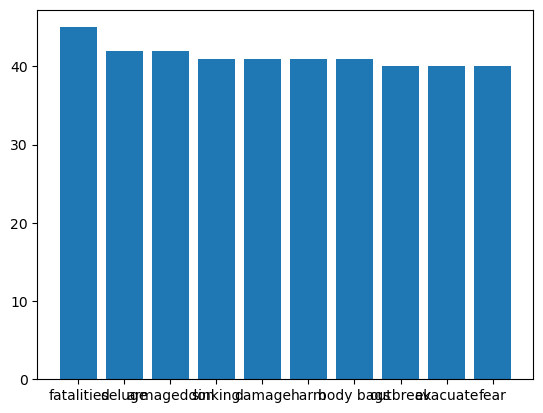

In [9]:
x = ['fatalities', 'deluge', 'armageddon', 'sinking', 'damage', 'harm', 'body bags', 'outbreak', 'evacuate', 'fear']
bar_labels = ['tab:fatalities', 'tab:deluge', 'tab:armageddon', 'tab:sinking', 'tab:damage', 'tab:harm', 'tab:body bags', 'tab:outbreak', 'tab:evacuate', 'tab:fear']
plt.bar(x, word_count[0:10].values, label = bar_labels)

In [10]:
word_count_pos = df_pos['keyword'].value_counts()
word_count_neg = df_neg['keyword'].value_counts()

<BarContainer object of 10 artists>

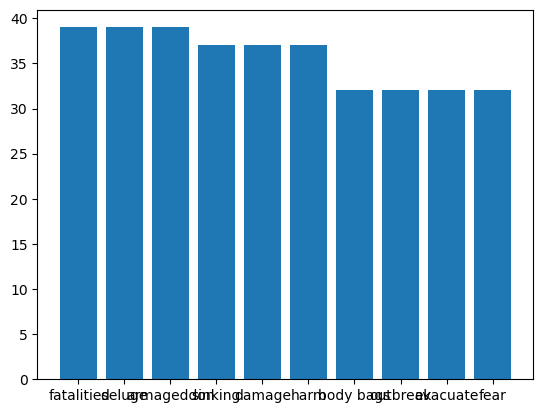

In [11]:
plt.bar(x, word_count_pos[0:10].values, label = bar_labels)

<BarContainer object of 10 artists>

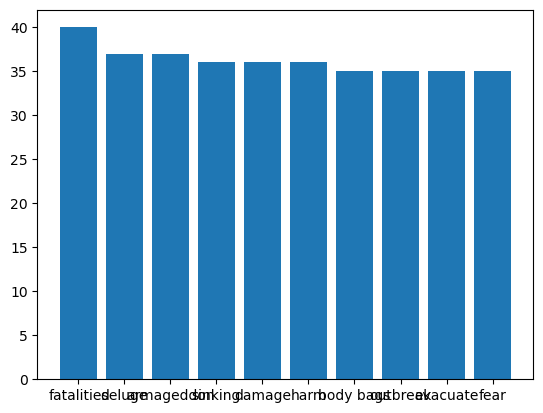

In [12]:
plt.bar(x, word_count_neg[0:10].values, label = bar_labels)

In [13]:
avg_values = df.groupby('location')['target'].mean().to_frame()
print(avg_values)

                        target
location                      
                           1.0
  Glasgow                  0.0
  Melbourne, Australia     0.0
  News                     1.0
  å_                       0.0
...                        ...
å_: ?? ÌÑ ? : ?            0.0
å_å_Los Mina Cityã¢       0.0
å¡å¡Midwest Û¢Û¢         0.0
åÊ(?Û¢`?Û¢å«)??          0.0
åø\_(?)_/åø                1.0

[3341 rows x 1 columns]


location
California, United States    0.166667
NYC                          0.166667
Brooklyn, NY                 0.166667
Vancouver, BC                0.200000
San Jose, CA                 0.200000
Name: target, dtype: float64


([0, 1, 2, 3, 4],
 [Text(0, 0, 'California, CA'),
  Text(1, 0, 'NYC'),
  Text(2, 0, 'Brooklyn, NY'),
  Text(3, 0, 'Vancouver, BC'),
  Text(4, 0, 'San Jose, CA')])

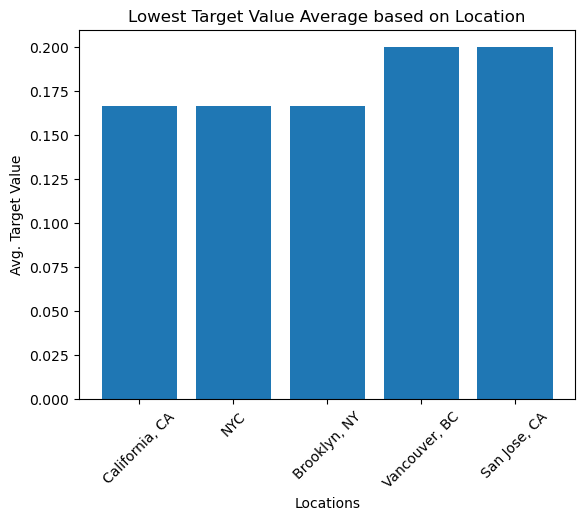

In [14]:
avg_val = avg_values[avg_values > 0]
avg_val = avg_val[avg_values < 1.0]
# avg_val.remove(float("NaN"))
avg_val = avg_val.dropna()
avg_val = avg_val['target'].sort_values()
print(avg_val[3:8])
x_val_l = ['California, CA', 'NYC', 'Brooklyn, NY', 'Vancouver, BC', 'San Jose, CA']
y_val_l = [0.166667, 0.166667, 0.166667, 0.2, 0.2]
plt.bar(x_val_l, y_val_l)
plt.title("Lowest Target Value Average based on Location")
plt.xlabel('Locations')
plt.ylabel('Avg. Target Value')
plt.xticks(rotation=45)

location
Melbourne, Australia        0.800000
WorldWide                   0.800000
Lagos, Nigeria              0.800000
Puerto Rico                 0.800000
The Netherlands             0.800000
Oklahoma City, OK           0.833333
Pedophile hunting ground    0.833333
India                       0.833333
Paterson, New Jersey        0.833333
Mumbai                      0.863636
Name: target, dtype: float64


([0, 1, 2, 3, 4],
 [Text(0, 0, 'The Netherlands'),
  Text(1, 0, 'Oklahoma City, OK'),
  Text(2, 0, 'Patterson, New Jersey'),
  Text(3, 0, 'India'),
  Text(4, 0, 'Mumbai')])

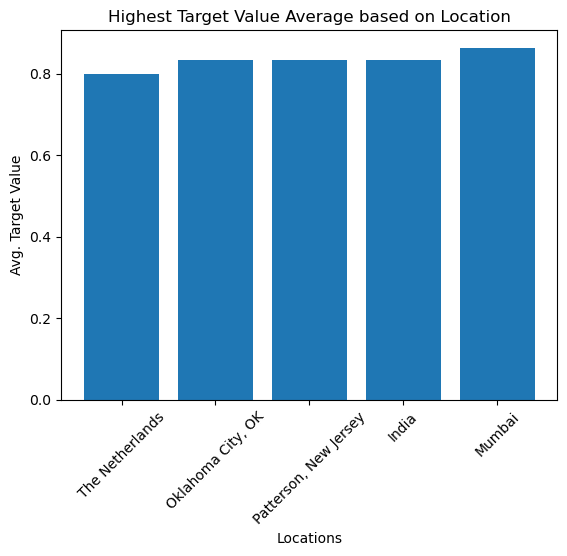

In [15]:
print(avg_val[304:])
x_val_h = ['The Netherlands', 'Oklahoma City, OK', 'Patterson, New Jersey', 'India', 'Mumbai']
y_val_h = [0.8, 0.8333333, 0.8333333, 0.8333333, 0.863636]
plt.bar(x_val_h, y_val_h)
plt.title("Highest Target Value Average based on Location")
plt.xlabel('Locations')
plt.ylabel('Avg. Target Value')
plt.xticks(rotation=45)

In [16]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

In [17]:
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/gautamsethi/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [18]:
df['scores'] = df['text'].apply(lambda text: sia.polarity_scores(str(text)))

In [19]:
df['scores']

0       {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'comp...
1       {'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'comp...
2       {'neg': 0.095, 'neu': 0.905, 'pos': 0.0, 'comp...
3       {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
4       {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
                              ...                        
7608    {'neg': 0.262, 'neu': 0.738, 'pos': 0.0, 'comp...
7609    {'neg': 0.166, 'neu': 0.834, 'pos': 0.0, 'comp...
7610    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
7611    {'neg': 0.345, 'neu': 0.655, 'pos': 0.0, 'comp...
7612    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: scores, Length: 7613, dtype: object

In [20]:
sentimentResults = []
for i in df['scores']:
    sentimentResults.append(i['pos'] - i['neg'])

In [21]:
df

,id,keyword,location,text,target,scores
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,"{'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'comp..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,"{'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'comp..."
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,"{'neg': 0.095, 'neu': 0.905, 'pos': 0.0, 'comp..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,"{'neg': 0.262, 'neu': 0.738, 'pos': 0.0, 'comp..."
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,"{'neg': 0.166, 'neu': 0.834, 'pos': 0.0, 'comp..."
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,"{'neg': 0.345, 'neu': 0.655, 'pos': 0.0, 'comp..."


In [22]:
temp_keyword_list = dict()
for i in df_pos['keyword']:
    i = str(i)
    i_key = i.lower()
    i_key = i_key.replace('%20',' ')
    if i_key != "nan":
        if i_key.replace('%20',' ') in temp_keyword_list:
            temp_keyword_list[i_key] = temp_keyword_list[i_key] + 1
        else:
            temp_keyword_list[i_key] = 1
            
temp_keyword_neg = dict()
for i in df_neg['keyword']:
    i = str(i)
    i_key = i.lower()
    i_key = i_key.replace('%20',' ')
    if i_key != "nan":
        if i_key in temp_keyword_neg:
            temp_keyword_neg[i_key] = temp_keyword_neg[i_key] + 1
        else:
            temp_keyword_neg[i_key] = 1
uniq_keyword_list = []

for key, value in temp_keyword_list.items():
    if (key in temp_keyword_neg and value > temp_keyword_neg[key]) or key not in temp_keyword_neg:
        uniq_keyword_list.append(key)
        
# print(len(uniq_keyword_list))
# uniq_keyword_list = set(temp_keyword_list)
# print(df_neg)
# print(temp_keyword_list - temp_keyword_neg)
# print(len(temp_keyword_list), len(temp_keyword_neg))
# print(temp_keyword_list)

In [23]:
temp_keywords = ['biological attack', 'damage', 'disaster', 'emergency', 'immobile', 'incident', 'landslide', 'nuclear', 'fire']
for i in temp_keywords:
    uniq_keyword_list.append(i)
freq_keyword_list = []
for i in df['text']:
    temp_count = 0
    temp_length = 0
    temp_text = i.lower().split()
    for j in uniq_keyword_list:
        temp_count = temp_count + i.lower().count(j)
    for j in stopwords:
        # print(j, i.lower().count(j))
        if j in temp_text:
            temp_length = temp_length + 1
    temp_length = len(i.split())
    freq_keyword_list.append(temp_count/temp_length)

In [24]:
df['sentiment_score'] = sentimentResults
df['keyword freq.'] = freq_keyword_list
newList = []
for i in range(0, len(sentimentResults)):
    temp = sentimentResults[i]*freq_keyword_list[i]
    newList.append(temp*temp*temp)
df['Product of Sentiment/Freq.'] = newList


In [25]:
df_new = df[['text', 'scores', 'sentiment_score', 'keyword freq.', 'target', 'Product of Sentiment/Freq.']]
df_new

,text,scores,sentiment_score,keyword freq.,target,Product of Sentiment/Freq.
0,Our Deeds are the Reason of this #earthquake M...,"{'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'comp...",0.149,0.076923,1,1.505666e-06
1,Forest fire near La Ronge Sask. Canada,"{'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'comp...",-0.286,0.285714,1,-5.456246e-04
2,All residents asked to 'shelter in place' are ...,"{'neg': 0.095, 'neu': 0.905, 'pos': 0.0, 'comp...",-0.095,0.045455,1,-8.051982e-08
3,"13,000 people receive #wildfires evacuation or...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.375000,1,0.000000e+00
4,Just got sent this photo from Ruby #Alaska as ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.125000,1,0.000000e+00
...,...,...,...,...,...,...
7608,Two giant cranes holding a bridge collapse int...,"{'neg': 0.262, 'neu': 0.738, 'pos': 0.0, 'comp...",-0.262,0.090909,1,-1.351219e-05
7609,@aria_ahrary @TheTawniest The out of control w...,"{'neg': 0.166, 'neu': 0.834, 'pos': 0.0, 'comp...",-0.166,0.100000,1,-4.574296e-06
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.125000,1,0.000000e+00
7611,Police investigating after an e-bike collided ...,"{'neg': 0.345, 'neu': 0.655, 'pos': 0.0, 'comp...",-0.345,0.105263,1,-4.789459e-05


In [26]:
df_keyword = df[['text', 'keyword freq.']]
df_keyword

,text,keyword freq.
0,Our Deeds are the Reason of this #earthquake M...,0.076923
1,Forest fire near La Ronge Sask. Canada,0.285714
2,All residents asked to 'shelter in place' are ...,0.045455
3,"13,000 people receive #wildfires evacuation or...",0.375000
4,Just got sent this photo from Ruby #Alaska as ...,0.125000
...,...,...
7608,Two giant cranes holding a bridge collapse int...,0.090909
7609,@aria_ahrary @TheTawniest The out of control w...,0.100000
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,0.125000
7611,Police investigating after an e-bike collided ...,0.105263


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import get_scorer_names

In [28]:
x_val = df_new[['sentiment_score','keyword freq.','Product of Sentiment/Freq.']]
y_val = df_new['target']

l_model = LogisticRegression(solver='liblinear', random_state=0)
log_score_cv_a = cross_val_score(l_model, x_val, y_val, cv = 5, scoring='accuracy')
# get_scorer_names()
log_score_cv_p = cross_val_score(l_model, x_val, y_val, cv = 5, scoring='precision')
log_score_cv_r = cross_val_score(l_model, x_val, y_val, cv = 5, scoring='recall')


In [29]:
print("Mean Accuracy: ",sum(log_score_cv_a)/5)
print("Mean Precision: ",sum(log_score_cv_p)/5)
print("Mean Recall: ",sum(log_score_cv_r)/5)

Mean Accuracy:  0.7063000699739345
Mean Precision:  0.7391781154258065
Mean Recall:  0.49649415225155824


In [30]:
print(len(uniq_keyword_list))

95


In [37]:
print(x_val['sentiment_score'].values)

[ 0.149 -0.286 -0.095 ...  0.    -0.345  0.   ]


[0 1 0 ... 1 1 1]


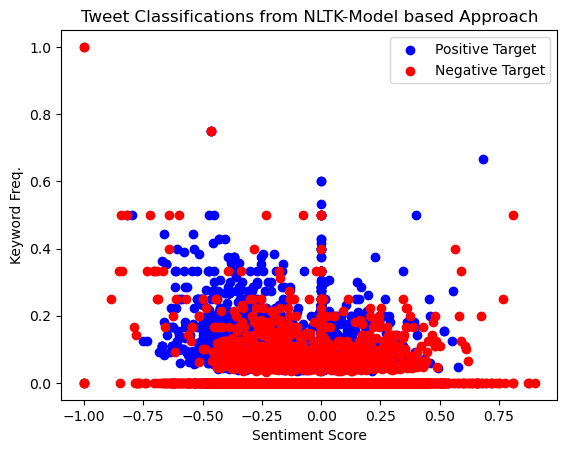

In [67]:
l_model.fit(x_val, y_val)
print(l_model.predict(x_val))

# ax = plt.axes(projection ="3d")

df_pos_val = df_new.loc[df['target'] == 1]
df_neg_val = df_new.loc[df['target'] == 0]
 
# Creating plot
x_val_pos = df_pos_val['sentiment_score']
x_val_neg = df_neg_val['sentiment_score']

x_val_pos_k = df_pos_val['keyword freq.']
x_val_neg_k = df_neg_val['keyword freq.']

plt.scatter(x_val_pos.values, x_val_pos_k.values, color='blue', label='Positive Target')
plt.scatter(x_val_neg.values, x_val_neg_k.values, color='red', label='Negative Target')
plt.xlabel('Sentiment Score')
plt.ylabel('Keyword Freq.')
plt.title('Tweet Classifications from NLTK-Model based Approach')
plt.legend()


# plt.scatter(x_val,l_model.predict_proba(x))
# print(x_val.shape,y_val.shape)
# print(x_val['keyword freq.'])
# print(x_val['keyword_freq.'])

Text(0.5, 1.0, 'NLTK-Model & BERT-Model Based Approach Performance')

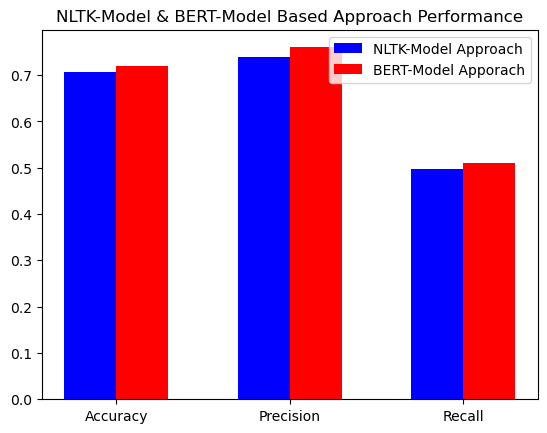

In [66]:

xVals = np.arange(3)
plt.bar(xVals, [0.7063, 0.7392, 0.4965], 0.3, color = 'blue', label='NLTK-Model Approach')
plt.bar(xVals+0.3, [0.72, 0.76, 0.51], 0.3, color = 'red', label='BERT-Model Apporach')

plt.xticks(xVals+0.15, ['Accuracy', 'Precision', 'Recall'])

plt.legend()

plt.title('NLTK-Model & BERT-Model Based Approach Performance')


In [32]:
# and plot the result
# from scipy.special import expit

# plt.figure(1, figsize=(4, 3))
# plt.l_model
# plt.scatter(x_val['sentiment_score'], x_val['keyword_freq.'])

# loss = expit(x_val * l_model.coef_ + l_model.intercept_).ravel()
# plt.plot(x_val, loss, label="Logistic Regression Model", color="red", linewidth=3)

# plt.ylabel("y")
# plt.xlabel("X")
# # plt.xticks(range(-5, 10))
# # plt.yticks([0, 0.5, 1])
# # plt.ylim(-0.25, 1.25)
# # plt.xlim(-4, 10)
# plt.legend(
#     loc="lower right",
#     fontsize="small",
# )
# plt.tight_layout()
# plt.show()

In [33]:
test_df = pd.read_csv('572_project_test.csv')
test_df

In [34]:
test_df['scores'] = test_df['text'].apply(lambda text: sia.polarity_scores(str(text)))
sentimentResults = []
for i in test_df['scores']:
    sentimentResults.append(i['pos'] - i['neg'])
    
freq_keyword_list = []
for i in test_df['text']:
    temp_count = 0
    for j in uniq_keyword_list:
        temp_count = temp_count + i.lower().count(j)
    freq_keyword_list.append(temp_count/len(i.split()))
    
test_df['sentiment_score'] = sentimentResults
test_df['keyword freq.'] = freq_keyword_list

x_val_test = test_df[['sentiment_score', 'keyword freq.']]

y_val_test = l_model.predict(x_val_test)

In [35]:
final_result_id = test_df['id']

data_test = list(zip(final_result_id, y_val_test))

data_test

final_result = pd.DataFrame(data_test, columns=['id', 'target'])
final_result.to_csv('sethi_submission.csv', index = False, encoding='utf-8')

In [36]:
final_result

In [37]:
final_result.to_csv('sethi_submission.csv', index = False, encoding='utf-8')


In [38]:
df.iloc[7611]['text']

In [39]:
uniq_keyword_list